---
title       : "Assignment: reproducing Grieco & McDevitt (2017) : Inference"
subtitle    : 
author      : Paul Schrimpf
date        : `j using Dates; print(Dates.today())`
bibliography: "dialysis.bib"
link-citations: true
options:
      out_width : 100%
      wrap : true
      fig_width : 800
      dpi : 192
---

[![](https://i.creativecommons.org/l/by-sa/4.0/88x31.png)](http://creativecommons.org/licenses/by-sa/4.0/)

This work is licensed under a [Creative Commons Attribution-ShareAlike
4.0 International
License](http://creativecommons.org/licenses/by-sa/4.0/) 

$$
\def\indep{\perp\!\!\!\perp}
\def\Er{\mathrm{E}}
\def\R{\mathbb{R}}
\def\En{{\mathbb{E}_n}}
\def\Pr{\mathrm{P}}
\newcommand{\norm}[1]{\left\Vert {#1} \right\Vert}
\newcommand{\abs}[1]{\left\vert {#1} \right\vert}
\DeclareMathOperator*{\argmax}{arg\,max}
\DeclareMathOperator*{\argmin}{arg\,min}
\def\inprob{\,{\buildrel p \over \rightarrow}\,} 
\def\indist{\,{\buildrel d \over \rightarrow}\,} 
$$

This document discusses inference for the two-step production function
estimator in Grieco \& McDevitt. A notebook version is available [here.](dialysis-inference.ipynb)

# Inference for Grieco \& McDevitt Replication

Many, perhaps most, estimators in econometrics are
extrumem estimators. That is, many estimators are defined by
$$
\hat{\theta} = \argmax_{\theta \in \Theta} \hat{Q}_n(\theta)
$$
where $\hat{Q}_n(\theta)$ is some objective function that depends on
data. Examples include maximum likelihood,
$$
\hat{Q}_n(\theta) = \frac{1}{n} \sum_{i=1}^n f(z_i | \theta)
$$
nonlinear least squares,
$$
\hat{Q}_n(\theta) = \frac{1}{n} \sum_{i=1}^n (y_i - h(x_i,\theta))^2
$$
and as we are using for this example, GMM,
$$
\hat{Q}_n(\theta) = \left(\frac{1}{n} \sum_{i=1}^n g(z_i,
\theta)\right)' \hat{W} \left(\frac{1}{n} \sum_{i=1}^n g(z_i,
\theta)\right).
$$
See @newey1994 for more details and examples.

We will encounter extremum estimators often in this course, so it is
useful to be familiar with their statistical properties. However,
since this course is not focused on econometrics, we will just state
some basic "high-level" conditions for consistency and asymptotic
normality, and only give brief sketches of proofs. Our main goal is to find
the asymptotic distribution of $\hat{\theta}$, so that we can report
standard errors and confidence regions. If $Q_n$ is differentiable,
then 
$$
  0 = \nabla \hat{Q}_n(\hat{\theta})
$$
Taking a first order expansion around $\theta_0$, 
$$
  0 \approx \nabla \hat{Q}_n(\theta_0) + (\hat{\theta}-\theta_0) \nabla^2 Q_n(\theta_0)
$$
Rearranging and multiplying by $\sqrt{n}$, gives
$$
\sqrt{n}(\hat{\theta}-\theta_0) \approx (\nabla^2 Q_n(\theta_0))^{-1}
\sqrt{n} \hat{Q}_n(\theta_0)
$$
If a law of large number applies to $\nabla^2 Q_n(\theta_0)$ and a
central limit theorem applies to $\sqrt{n} \hat{Q}_n(\theta_0)$, then
$\sqrt{n}(\hat{\theta}-\theta_0)$ will be asymptotically normal. The
following theorem states this idea somewhat more precisely.

### Consistency

**Consistency for extremum estimators**: assume

1. $\hat{Q}_n(\theta)$ converges uniformly in probability to
   $Q_0(\theta)$

2. $Q_0(\theta)$ is uniquely maximized at $\theta_0$.

3. $\Theta$ is compact and $Q_0(\theta)$ is continuous.

Then $\hat{\theta} \inprob \theta_0$


### Asymptotic normality

**Asymptotic normality for extremum estimators**: assume

1. $\hat{\theta} \inprob \theta_0$

2. $\theta_0 \in interior(\Theta)$

3. $\hat{Q}_n(\theta)$ is twice continuously differentiable in open $N$
   containing $\theta$, and $\sup_{\theta \in N} \Vert \nabla^2
                             \hat{Q}_n(\theta) - H(\theta) \Vert
                             \inprob 0$ with $H(\theta_0)$ nonsingular
4. $\sqrt{n} \nabla \hat{Q}_n(\theta_0) \indist N(0,\Sigma)$

Then $\sqrt{n} (\hat{\theta} - \theta_0) \indist N\left(0,H^{-1} \Sigma
  H^{-1} \right)$

### GMM 

For a GMM objective function of the form:
$$ [1/n \sum_i g_i(\theta)] W_n [1/n \sum g_i(\theta)]$$, 
if we assume:

1. $1/\sqrt{n} \sum_i g_i(\theta_0) \indist N(0,\Sigma)$

2. $1/n \sum_i \nabla g_i(\theta) \inprob E[\nabla g(\theta)] = D$, 
   $W_n \inprob W$

3. $(D'WD)$ is nonsingular.

then the above theorem for asymptotic normality of extremum
estimators implies that 
$$
\sqrt{n}(\hat{\theta} - \theta_0) \indist N(0,\Omega)
$$
where 
$$
 \Omega= (D'WD)^{-1} (D' W \Sigma W D) (D'WD)^{-1}.
$$
If we additionally assume $W_n \inprob \Sigma^{-1}$, e.g. observations
are independent and $W_n =
\widehat{Var}(g_i(\theta))^{-1}$, then the asymptotic variance
simplifies to $(D' \Sigma D)^{-1}$. This choice of $W$ is efficient in
that it leads to the smallest asymptotic variance. 

### 2-step estimators

The above applies to estimators that come from minimizing a single
objective function. This application involves a multi-step
estimator. First, we estimated $\alpha$ and $\Phi()$, then we
estimated $\beta$ by GMM using moments of the form:
$$
\hat{\beta} = \argmin [1/n \sum_i g_i(\beta, \hat{\alpha},
 \hat{\Phi})] W_n [1/n \sum g_i(\beta, \hat{\alpha}, \hat{\Phi}) ] 
$$
A similar expansion as above will give
$$
\sqrt{n}(\hat{\beta} - \beta_0) \approx -(D'WD)^{-1} D' W \left(1/\sqrt{n}
\sum g_i(\beta, \hat{\alpha}, \hat{\Phi}) \right)
$$
where $D=\Er[\nabla_\beta g(\beta, \alpha, \Phi)]$. If we also expand
$g_i$ in terms of $\alpha$ and $\Phi$, we will get, 
$$
\sqrt{n}(\hat{\beta} - \beta_0) \approx -(D'WD)^{-1} D' W \left(1/\sqrt{n}
\sum g_i(\beta_0, \alpha_0, \Phi_0) \right) + \Er[\frac{\partial g_i}{\partial
\alpha}(\beta,\alpha,\Phi)] \sqrt{n}(\hat{\alpha}-\alpha_0) + \Er[\frac{\partial g_i}{\partial
\Phi}(\beta,\alpha,\Phi) \sqrt{n}(\hat{\Phi}-\Phi_0) ]. 
$$
So, there will be additional variance in $\hat{\beta}$ from the
estimation of $\hat{\alpha}$ and $\hat{\Phi}$. Since $\alpha$ is
finite dimensional, it is not too difficult to derive the distribution
of $\sqrt{n}(\hat{\alpha}-\alpha_0)$ and estimate $\Er[\frac{\partial g_i}{\partial
\alpha}(\beta,\alpha,\Phi)]$. However, $\hat{\Phi}$ is a function and
is more difficult to deal with. Under some strong assumptions, 
$$
 \Er[\frac{\partial g_i}{\partial
\Phi}(\beta,\alpha,\Phi) \sqrt{n}(\hat{\Phi}-\Phi_0) ] \indist N,
$$
but the needed assumptions are slightly restrictive and are tedious to
state. An alternative approach is to redefine $g_i$ to ensure that
$E[\frac{\partial g_i}{\partial \Phi}] = 0$. This can be done by
letting 
$$
\begin{align*}
   g_{jt}(\beta, \alpha, \Phi) = & \left(y_{jt} - \alpha q_{jt} -
   x_{jt} \beta - h(\Phi(w_{jt-1}) -
   x_{jt-1}\beta) \right) \left(x_{jt} -
   \Er[x|\Phi(w_{jt-1}) - x_{jt-1}\beta]\right) + \\
   & - \left(y_{jt-1} - \alpha
   q_{jt-1} - \Phi(w_{jt-1})\right) h'(\Phi(w_{jt-1}) - x_{jt-1}\beta) \left(x_{jt} -
   \Er[x|\Phi(w_{jt-1}) - x_{jt-1}\beta]\right)
\end{align*}
$$
where $x = (k, l)$, and 
$h(\Phi(w_{jt-1}) - x_{jt-1}) =  \Er[y_{jt} - \alpha q_{jt} - x_{jt}
 \beta |\Phi(w_{jt-1}) - x_{jt-1}\beta]$. It is not too difficult to
verify that 
$$
\Er[g_{jt}(\beta_0,\alpha_0,\Phi_0)] = 0
$$
and 
$$
0 = D_\Phi \Er[g_{jt}(\beta_0,\alpha_0,\Phi_0)]\;\;,\;\; 0 = D_h \Er[g_{jt}(\beta_0,\alpha_0,\Phi_0)] 
$$
In other words, these moment conditions are orthogonal in the sense of
@chernozhukov2018. Estimation error in $\Phi$ and $h$ only has second
order effects on the estimate of $\beta$. Under appropriate
assumptions, these second order effects will vanish quickly enough
that they can be ignored in the asymptotic distribution of
$\hat{\beta}$. 

We can similarly deal with the uncertainty in $\hat{\alpha}$ by
redefining the moment condition to be orthogonal with respect to
$\alpha$. Let
$$
\tilde{g}_{jt}(\beta,\alpha,\Phi) = g_{jt}(\beta,
\alpha, \Phi) - \Er[ D_\alpha g_{jt}(\beta_0,
\alpha, \Phi)] \frac{(y_{jt} - \alpha q_{jt} - \Phi(w_{jt}))
(\Er[q|z_{jt},w_{jt}] - \Er[q|w_{jt}])}{\Er[(q -
\Er[q|w])(\Er[q|z,w]-\Er[q|w])]}.
$$
Then $\Er[\tilde{g}_{jt}(\beta_0,\alpha_0,\Phi_0)] = 0$ and 
$$
0 = D_\Phi \Er[\tilde{g}_{jt}(\beta_0,\alpha_0,\Phi_0)]\;\;,\;\; 0 = D_\alpha
\Er[\tilde{g}_{jt}(\beta_0,\alpha_0,\Phi_0)].
$$
Hence, 
$$
\begin{align*}
\frac{1}{\sqrt{n}} \sum_{j,t} \tilde{g}_{jt}(\beta_0, \hat{\alpha}, \hat{\Phi} )
= & \frac{1}{\sqrt{n}} \sum_{j,t} \tilde{g}_{jt}(\beta_0, \alpha_0,
\Phi_0 ) + o_p(1) 
\end{align*}
$$

Under appropriate assumptions a CLT will apply to $\tilde{g}_{jt}$, so 
$$
\frac{1}{\sqrt{n}}  \sum_{j,t} \tilde{g}_{jt}(\hat{\beta}, \hat{\alpha},
\hat{\Phi} ) = \frac{1}{\sqrt{n}}  \sum_{j,t} \tilde{g}_{jt}(\beta_0,\alpha_0,\Phi_0) + o_p(1)
\indist N(0,\Sigma)
$$
Furthermore, $\Sigma$ can estimated by taking the sample (clustered)
covariance of
$\tilde{g}_{jt}(\beta,\hat{\alpha},\hat{\Phi})$. Denote this by
$\hat{\Sigma}(\beta)$. We then have
$$
    Q_n^{CUE}(\beta_0) = \left(\frac{1}{n}  \sum_{j,t} \tilde{g}_{jt}(\beta_0, \hat{\alpha},
    \hat{\Phi} ) \right)' \hat{\Sigma(\beta_0)}^{-1} \left(\frac{1}{n}
    \sum_{j,t} \tilde{g}_{jt}(\beta_0, \hat{\alpha}, \hat{\Phi} )
    \right) \indist \chi^2_{dim(\tilde{g}_{jt})}.
$$
This can be used to test $H_0: \beta = \beta_0$, or to form a
confidence region by taking all values of $\beta$ for which the test
fails to reject. Such an inference procedure is robust to
identification problems in that it does not require an assumption
about $D = D_\beta \Er[g_{jt}(\beta,\alpha_0,\Phi_0)]$ being full rank or $Q_n$ being uniquely minimized
at $\beta_0$. If we are willing to assume strong identification in that 
$(D' \Sigma(\beta_0)^{-1} D)$ is invertible (and, loosely speaking, the estimated
version of this is far from singular relative to its estimation
error), then we can take an expansion to get 
$$
\sqrt{n}(\hat{\beta} - \beta_0) = (D'\Sigma^{-1} D)^{-1} D'\Sigma^{-1}
\frac{1}{\sqrt{n}} \tilde{g}_{jt}(\beta_0, \alpha_0, \Phi_0) + o_p(1)
\indist N(0, (D' \Sigma^{-1} D)^{-1}).
$$
                                              

See my notes from 628 and 622 on [extremum estimation](https://schrimpf.github.io/GMMInference.jl/extremumEstimation/)
and on
[bootstrap](https://schrimpf.github.io/GMMInference.jl/bootstrap/)
for more details.

# Results

First, we must load the data and prepare the data. (This repeats what was done in the assignment).

In [1]:
using Pkg
try
  using Dialysis # This assignment itself is in the "Dialysis" package. We will use some of the functions from it. 
catch
  Pkg.add(PackageSpec(url="https://github.com/UBCECON567/Dialysis"))
  using Dialysis
end
docdir = normpath(joinpath(dirname(Base.pathof(Dialysis)), "..","docs"))
Pkg.activate(docdir)
Pkg.instantiate()

using DataFrames                  
dialysis = loaddata()
sort!(dialysis, (:provfs, :year))
dialysis[!,:invest] = panellag(:stations, dialysis, :provfs, :year, -1) -
  dialysis[!,:stations]; 
dialysis[!,:labor] = (dialysis[!,:nurseFT] + 0.5*dialysis[!,:nursePT]+
                    dialysis[!,:ptcareFT] + 0.5*dialysis[!,:ptcarePT] +
                    dialysis[!,:dieticiansFT] + 0.5*dialysis[!,:dieticiansPT] +
                    dialysis[!,:social_workerFT] + 0.5*dialysis[!,:social_workerPT])
dialysis[!,:hiring] = panellag(:labor, dialysis, :provfs, :year, -1) -
  dialysis[!,:labor];
dialysis[!,:for_profit] = dialysis[!,:profit_status].=="For Profit"
dialysis[!,:fresenius] = dialysis[!,:chain_name].=="FRESENIUS"
dialysis[!,:davita] = dialysis[!,:chain_name].=="DAVITA";
using Statistics # for mean, std, and so on 
dialysis[!,:inspected_this_year] =
  ((dialysis[!,:days_since_inspection].>=0) .&
   (dialysis[!,:days_since_inspection].<365))
stateRates = by(dialysis, [:state, :year],
                df -> mean(skipmissing(df[!,:inspected_this_year])))
rename!(stateRates, :x1 => :state_inspection_rate)
dialysis = join(dialysis, stateRates, on = [:state, :year]);
dialysis[!,:city] = uppercase.(dialysis[!,:city]) 
comps = by(dialysis,[:city,:year],
           df -> mapreduce((x) -> ifelse(ismissing(x),0,1*(x>0)), +, df[!,:patient_months])
           )
rename!(comps, :x1 => :competitors)
dialysis = join(dialysis, comps, on = [:city,:year]);

using FixedEffectModels

dialysis[!,:idcat] = categorical(dialysis[!,:provfs])
qreg = reg(dialysis, @formula(pct_septic ~ days_since_inspection + patient_age +
                              pct_female + patient_esrd_years + pct_fistula + comorbidities +
                              hemoglobin), Vcov.cluster(:idcat),save=true) # saves residuals in augmentdf
dialysis[!,:quality] = -qreg.augmentdf[!,:residuals];
log_infmiss = x->ifelse(!ismissing(x) && x>0, log(x), missing) # -Inf confuses reg()
dialysis[!,:lpy] = log_infmiss.(dialysis[!,:patient_months]./12);
dialysis[!,:logL] = log_infmiss.(dialysis[!,:labor]);
dialysis[!,:logK] = log_infmiss.(dialysis[!,:stations]);

Activating environment at `~/.julia/dev/Dialysis/docs/Project.toml`


Now, we re-run the first step of estimation.

In [2]:
inc1 = ((dialysis[!,:patient_months] .> 0) .& (dialysis[!,:labor] .> 0) .&
           (dialysis[!,:stations] .> 0) .&
           .!ismissing.(dialysis[!,:quality]) .&
           .!ismissing.(dialysis[!,:std_mortality]) .&
           (dialysis[!,:invest].==0) .&
           (dialysis[!,:hiring].!=0));
inc1[ismissing.(inc1)] .= false;
dialysis[!,:inc1] = inc1;

dialysis[!,:lsmr] = log.(dialysis[!,:std_mortality] .+ .01)

(α, Φ, αreg, eyqz)=partiallinearIV(:lpy,  # y 
                         :quality, # q
                         :lsmr,   # z
                         [:hiring, :logL, :logK,
                         :state_inspection_rate, :competitors], # w
                         dialysis[findall(dialysis[!,:inc1]),:];
                         npregress=(xp, xd,yd)->polyreg(xp,xd,yd,degree=1),
                         parts=true                      
                         ) 

# we will need these later in step 2
dialysis[!,:Φ] = similar(dialysis[!,:lpy])
dialysis[:,:Φ] .= missing
rows = findall(dialysis[!,:inc1])
dialysis[rows,:Φ] = Φ
dialysis[!,:ey] = similar(dialysis[!,:lpy])
dialysis[:,:ey] .= missing
dialysis[rows,:ey] = eyqz[:,1]
dialysis[!,:eq] = similar(dialysis[!,:lpy])
dialysis[:,:eq] .= missing
dialysis[rows,:eq] = eyqz[:,2]
dialysis[!,:ez] = similar(dialysis[!,:lpy])
dialysis[:,:ez] .= missing
dialysis[rows,:ez] = eyqz[:,3]

α

-0.016731503377462428

The `objective_gm` function in Dialysis.jl constructs the $Q_n^{CUE}$
objective function described above. The following code minimizes it
and plots a confidence region for $\beta$ based on inverting the
$\chi^2$ test described above.

In [3]:
using Optim

(obj, momenti, cue, varfn) = objective_gm(:lpy, :logK, :logL, :quality, :Φ,
                                          :provfs, :year,
                                          [:logK, :logL], dialysis,
                                          clusterid=:idcat,
                                          npregress=(xp,xd,yd)->polyreg(xp,xd,yd,degree=1,
                                                                        deriv=true));
res = optimize(b->cue(b,α),    # objective
               [0.0, 0.0], # lower bounds, should not be needed, but
               # may help numerical performance 
               [1.0, 1.0], # upper bounds 
               [0.4, 0.2], # initial value               
               Fminbox(BFGS()),  # algorithm
               autodiff=:forward)
res
# calculate standard errors based on normal approximation
βhat = res.minimizer
gi = momenti(βhat,α)
(Σ, n) = varfn(gi)
using ForwardDiff
using LinearAlgebra # for diag
D = ForwardDiff.jacobian(β->mean(momenti(β,α), dims=1), βhat)
Vβ = inv(D'*inv(Σ)*D)/n
@show βhat
@show sqrt.(diag(Vβ))
nothing;

βhat = [2.0072100763983107e-20, 0.14987299477155056]
sqrt.(diag(Vβ)) = [1.4692926354291502, 0.05948171117514949]


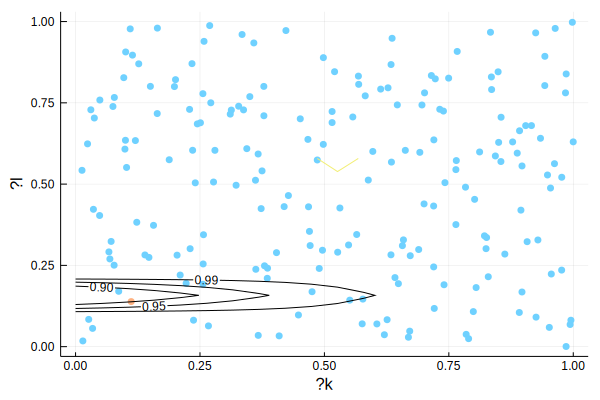

In [4]:
using Plots, Distributions
Plots.gr()
lb = [0., 0.]
ub = [1.,  1.]
ntest = 200
βtest = [rand(2).*(ub-lb) .+ lb for i in 1:ntest];
βtest = vcat(βtest'...)

fn = β->cue(β,α)
pval = Vector{Float64}(undef, ntest);
qval = similar(pval);
Threads.@threads for i in 1:size(βtest,1)
  qval[i] = fn(βtest[i,:]);
  pval[i] = cdf(Chisq(2),qval[i]);
end

crit = 0.9
fig=scatter(βtest[:,1],βtest[:,2], group=(pval.<crit), legend=false,
            markersize=4, markerstrokewidth=0.0, seriesalpha=1.0,
            palette=:isolum, xlabel="βk", ylabel="βl")
ngrid = 20
b = range.(lb,ub, length=ngrid)
pc = Matrix{Float64}(undef, length(b[1]), length(b[2]))
qc = similar(pc)
Threads.@threads for i in CartesianIndices(pc)
  qc[i] = fn([b[1][i[1]],b[2][i[2]]]);
  pc[i] = cdf(Chisq(2),qc[i]);
end

fig=contour!(b[1],b[2],pc',
            levels = [0.75, 0.9, 0.95, 0.99],
             contour_labels=true)
display(fig)

Here we plot $Q^{CUE}_n(\beta)$.

In [5]:
Plots.plotly()
surface(b[1],b[2],qc', xlabel="βk", ylabel="βl")

┌ Info: For saving to png with the Plotly backend ORCA has to be installed.
└ @ Plots /home/paul/.julia/packages/Plots/qZHsp/src/backends.jl:363


<!DOCTYPE html>
 
 
 Plots.jl